<a href="https://colab.research.google.com/github/savithrik199/DL-projects/blob/main/facemaskdet_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data="/content/drive/MyDrive/facedetima.zip"

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile(data,"r") as zip1:
  zip1.printdir()
  zip1.extractall()

File Name                                             Modified             Size
annotations/maksssksksss0.xml                  2020-05-22 07:18:56         1252
annotations/maksssksksss1.xml                  2020-05-22 07:18:56         3263
annotations/maksssksksss10.xml                 2020-05-22 07:18:56          570
annotations/maksssksksss100.xml                2020-05-22 07:18:56         1245
annotations/maksssksksss101.xml                2020-05-22 07:18:56          571
annotations/maksssksksss102.xml                2020-05-22 07:18:56          571
annotations/maksssksksss103.xml                2020-05-22 07:18:56         1584
annotations/maksssksksss104.xml                2020-05-22 07:18:56         2950
annotations/maksssksksss105.xml                2020-05-22 07:18:56         3268
annotations/maksssksksss106.xml                2020-05-22 07:18:56          571
annotations/maksssksksss107.xml                2020-05-22 07:18:56          572
annotations/maksssksksss108.xml         

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance

In [ ]:
face_model = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')

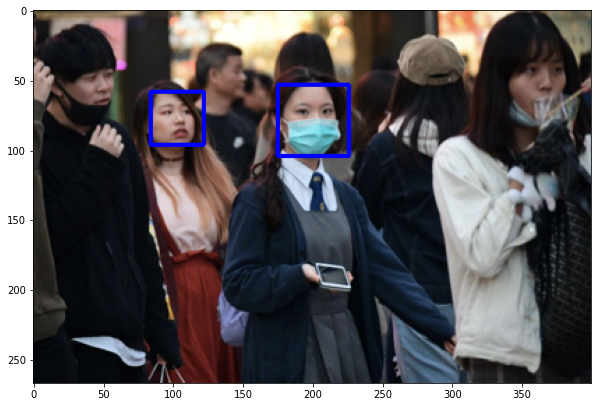

In [ ]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('/content/images/maksssksksss250.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),2)
plt.figure(figsize=(10,10))
plt.imshow(out_img)

In [ ]:
MIN_DISTANCE = 130

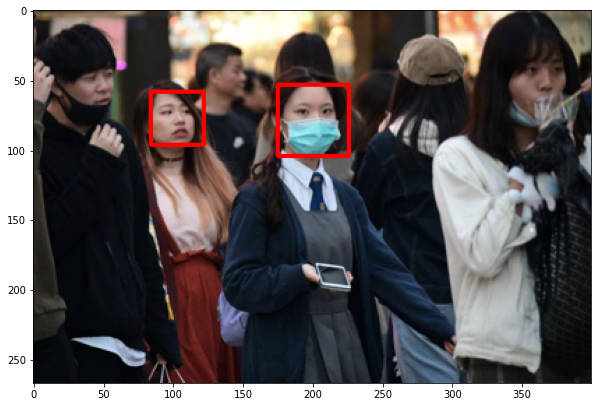

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),2)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
images="/content/drive/MyDrive/dataima.zip"

In [ ]:
with ZipFile(images,"r") as zip2:
  zip2.printdir()
  zip2.extractall()

File Name                                             Modified             Size
dataset/with_mask/1.jpeg                       2020-07-20 23:46:22         6272
dataset/with_mask/10.jpeg                      2020-07-20 23:46:22        15440
dataset/with_mask/100.jpeg                     2020-07-20 23:46:22         5699
dataset/with_mask/101.jpeg                     2020-07-20 23:46:22         6073
dataset/with_mask/102.jpeg                     2020-07-20 23:46:22         7290
dataset/with_mask/103.jpeg                     2020-07-20 23:46:22         6198
dataset/with_mask/104.jpeg                     2020-07-20 23:46:22         7459
dataset/with_mask/105.jpeg                     2020-07-20 23:46:22         7318
dataset/with_mask/106.jpeg                     2020-07-20 23:46:22         5334
dataset/with_mask/107.jpeg                     2020-07-20 23:46:22         6209
dataset/with_mask/108.jpeg                     2020-07-20 23:46:22         5366
dataset/with_mask/109.jpeg              

In [ ]:
train_dir = '../content/images/'
test_dir = '../content/images/'
val_dir = '../content/images'

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
CATEGORIES = ["with_mask", "without_mask"]

In [ ]:
images="/content/dataset"

In [ ]:
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(images, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

In [ ]:
len(data)

1237

In [ ]:
len(labels)

1237

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam",
	metrics=["accuracy"])


In [ ]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=32),
	validation_data=(testX, testY),
	epochs=20)

Epoch 1/20
31/31 [==============================] - 45s 364ms/step - loss: 0.4801 - accuracy: 0.7870 - val_loss: 0.1210 - val_accuracy: 0.9597
Epoch 2/20
31/31 [==============================] - 10s 325ms/step - loss: 0.1568 - accuracy: 0.9436 - val_loss: 0.0804 - val_accuracy: 0.9637
Epoch 3/20
31/31 [==============================] - 10s 326ms/step - loss: 0.1025 - accuracy: 0.9646 - val_loss: 0.0663 - val_accuracy: 0.9718
Epoch 4/20
31/31 [==============================] - 10s 325ms/step - loss: 0.0830 - accuracy: 0.9759 - val_loss: 0.0777 - val_accuracy: 0.9637
Epoch 5/20
31/31 [==============================] - 10s 328ms/step - loss: 0.0821 - accuracy: 0.9673 - val_loss: 0.0664 - val_accuracy: 0.9718
Epoch 6/20
31/31 [==============================] - 10s 329ms/step - loss: 0.0542 - accuracy: 0.9811 - val_loss: 0.0779 - val_accuracy: 0.9718
Epoch 7/20
31/31 [==============================] - 10s 324ms/step - loss: 0.0729 - accuracy: 0.9654 - val_loss: 0.0623 - val_accuracy: 0.9758

In [ ]:
CATEGORIES = ["with_mask", "without_mask"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


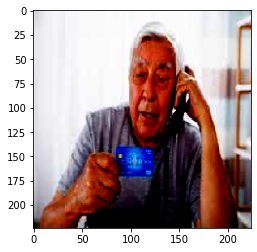

In [ ]:
plt.imshow(testX[0])
print(testX[0].shape)

In [ ]:
ypre=model.predict(testX[:1])

In [ ]:
ypre

array([[3.5739449e-05, 9.9996424e-01]], dtype=float32)

In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

In [ ]:
img = cv2.imread('/content/images/maksssksksss250.png')


In [ ]:
img.shape

(267, 400, 3)

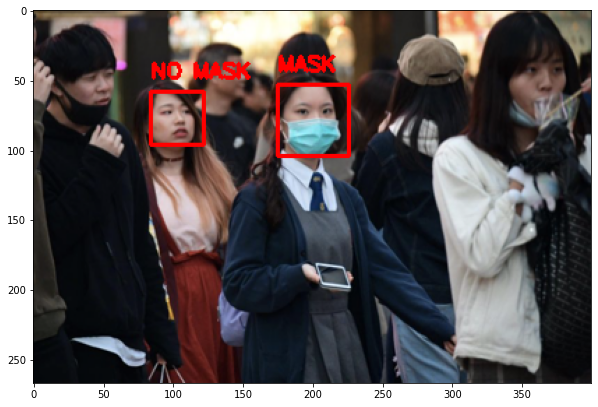

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(224,224))
        crop = np.reshape(crop,[1,224,224,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],2)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")